<a href="https://colab.research.google.com/github/ChandanMannem/Conference-Management-System/blob/master/Assignment_0_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 0 - Data and Visualization (Classification)

Author : Chandan Mannem

# Introduction

The objective of this assignment is to understand the dataset and implement different visualization techniques using different libraries available in python. This will be helpful in understanding which models are to be used in different situations. Pandas, matplotlib and numpy libraries are used in this assignment for manipulation and visualization of the data.

# 1. Introduction of data for classification & source

DataSet : https://www.kaggle.com/wenruliu/adult-income-dataset


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.



**Categorical Attributes**

* workclass
* education
* marital-status
* occupation
* relationship
* race
* sex
* native-country

**Continuous Attributes**

* age
* education-num
* fnlwgt
* capital-gain
* capital-loss
* hours-per-week

# 2. Reading the data

In [ ]:
# Importing all required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Reading to pandas dataframe from flle
df = pd.read_csv('/content/adult.csv')

In [ ]:
# Visualize dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
 # Shape of the data frame
df.shape

(48842, 15)

# 3.Preprocessing of the data

In [ ]:
# Visualize the top few rows
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# drop duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#replacing nulls by 0
df = df.fillna(0)

In [ ]:
df.loc[df['income'] == 0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
df.drop(axis=0, index= 38463, inplace= True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.loc[df['income'] == 0]

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
df.head()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 4. Visualization of the data

In [ ]:
# Employees income count based on employee
df['income'].value_counts()

<=50K    37108
>50K     11681
Name: income, dtype: int64

<function matplotlib.pyplot.show>

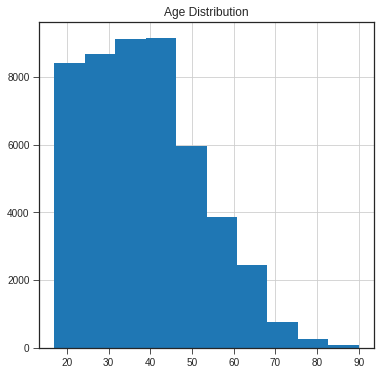

In [ ]:
# Age distribution
df['age'].hist(figsize = (6,6))
plt.title('Age Distribution')
plt.show

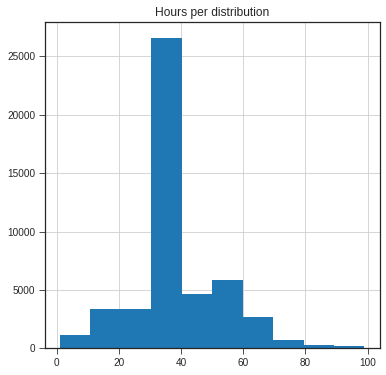

In [ ]:
# Hours per week Distribution
df['hours-per-week'].hist(figsize=(6,6))
plt.title('Hours per distribution')
plt.show()

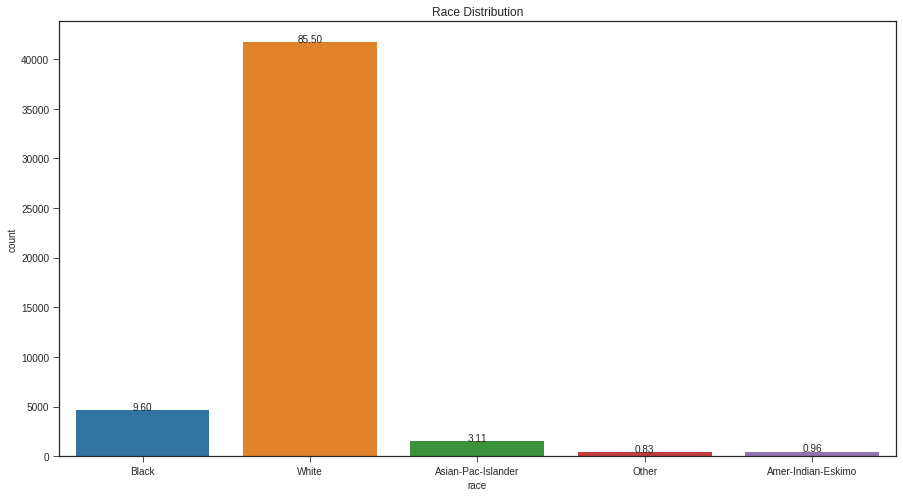

In [ ]:
# Race distribution
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.title("Race Distribution") 
plt.show()

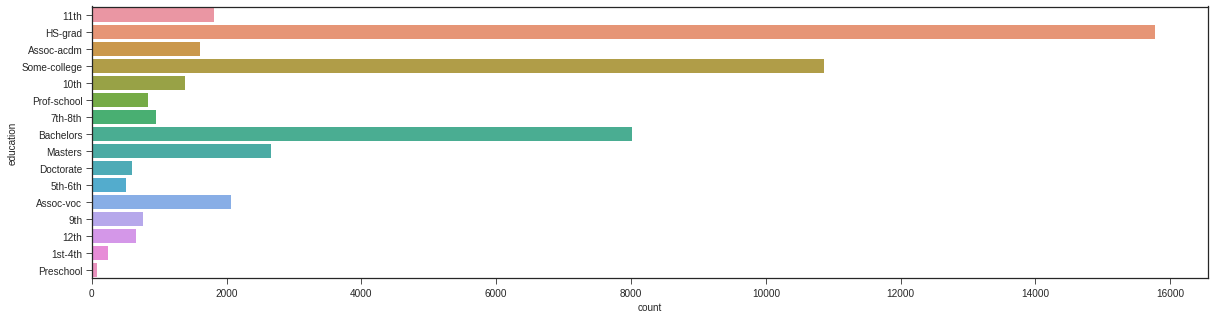

In [ ]:
# Education
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

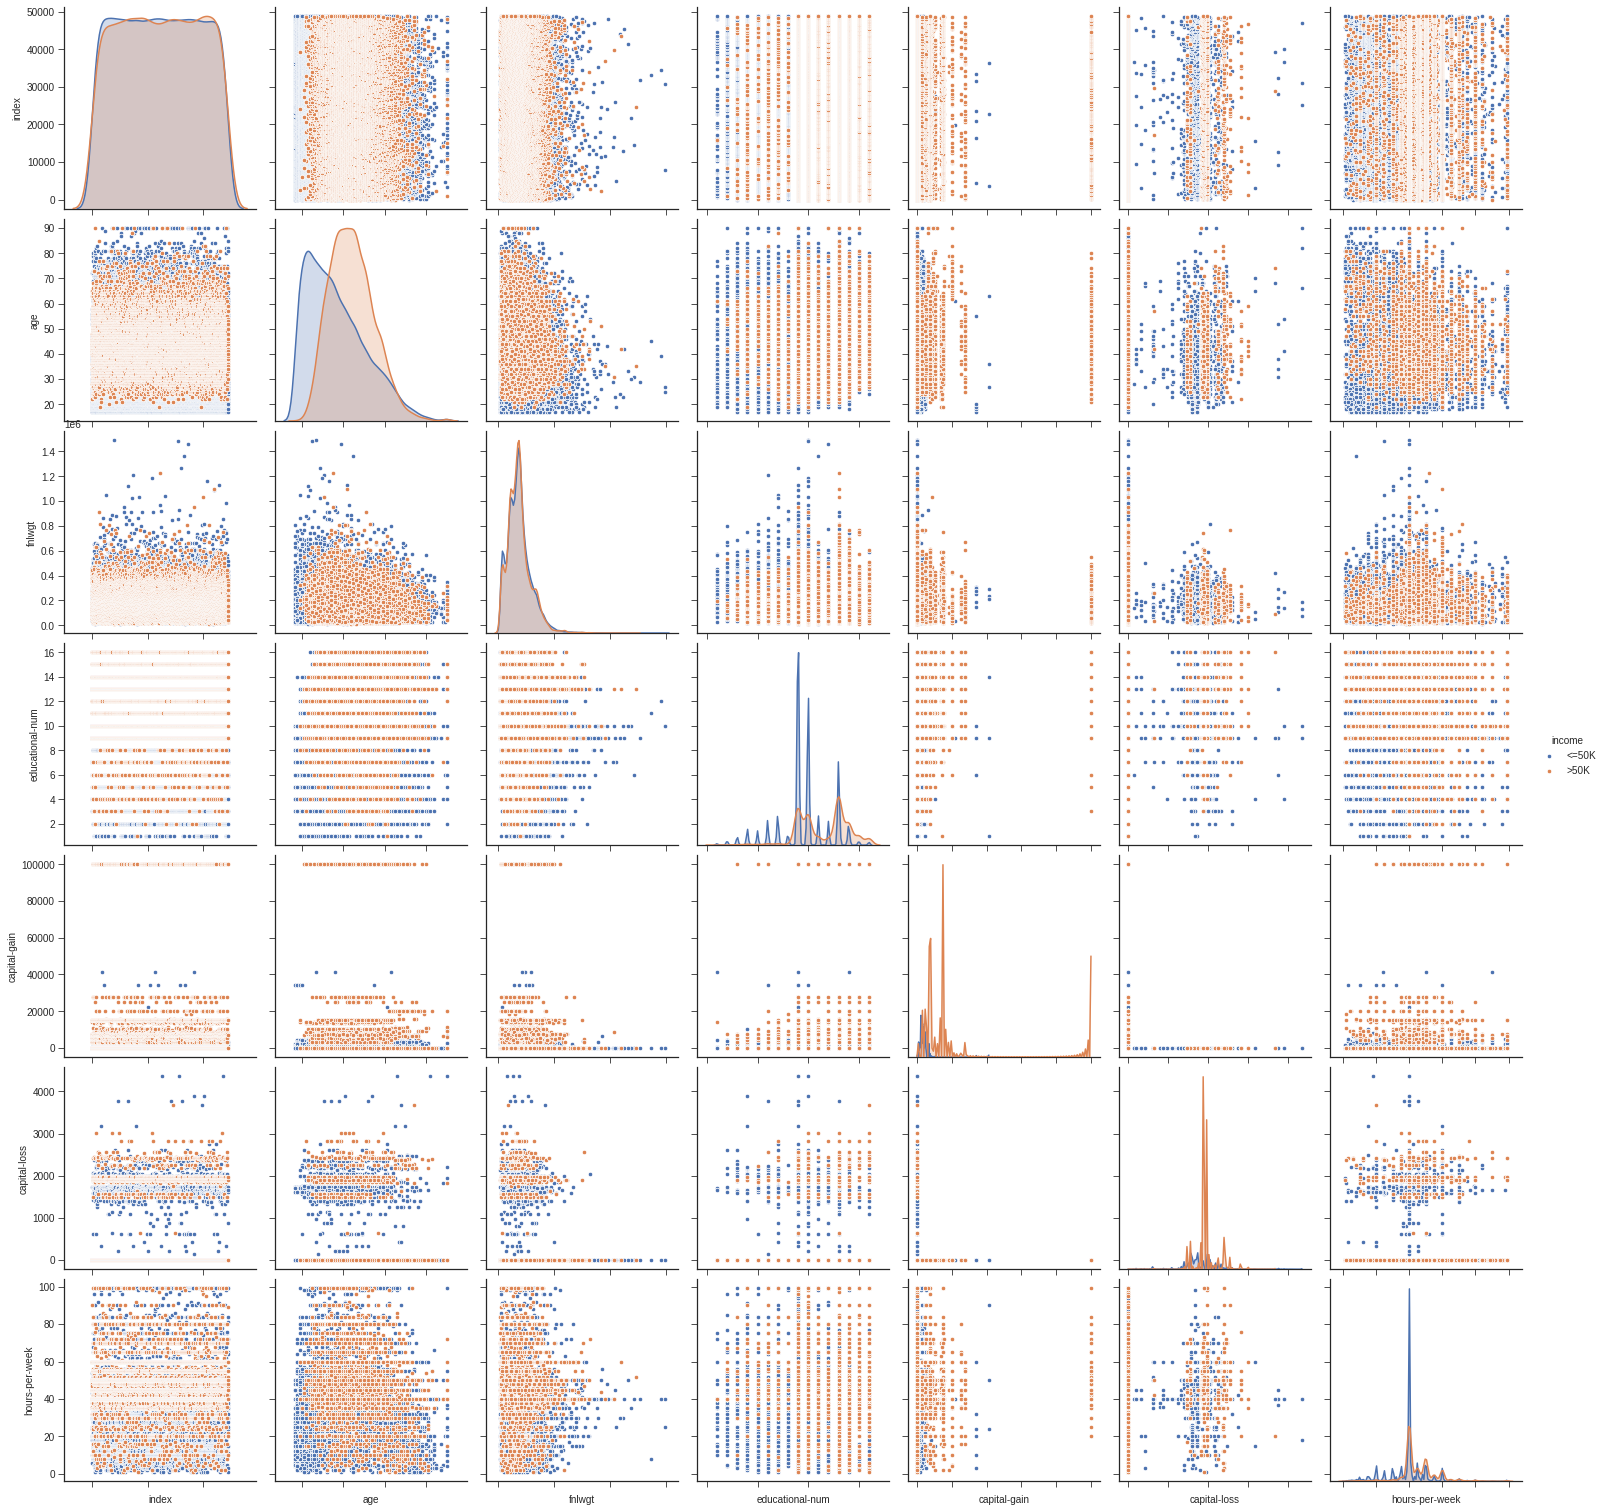

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(df, hue = 'income',palette = 'deep',
                  height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

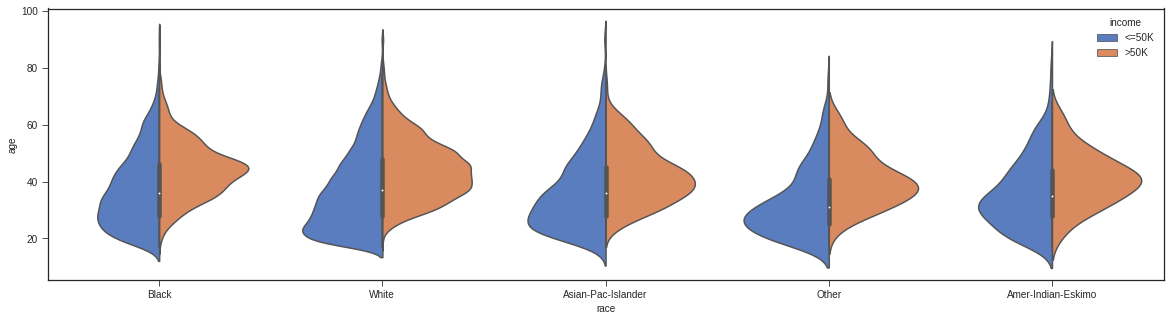

In [ ]:
#Income split using violin plot 
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=df, gridsize=100, palette="muted", split = True,  saturation=0.75)
ax

# 5. Preliminary Observation

* Nearly 80% Adults have average income of less than 50K
* Majority of working adults are between age 20 - 45.
* Average working hours per week is arount 50 hours.
* The dataset is mostly collected from whites.
* Majority of the adults completed HS-graduation and they are skill enough to get a job.
* Income group who earns >50k have flexible working hours.

# 6. Conclusions

* The dataset might be suffering from selection bias, e.g., it only includes data where people have one race but omits those with two races
* The dataset is old, some of the facts might not be applicable now
* How notebook is useful for visualization of data.


# 7. References

* http://www.cs.toronto.edu/~delve/data/adult/desc.html
* http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
* https://www.youtube.com/watch?v=cpZExlOKFH4&ab_channel=DataTalks
* https://www.youtube.com/watch?v=UsglokDLa2o

